<a href="https://colab.research.google.com/github/Roza1ind/mathLernRepo/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [68]:
!pip install pandas scikit-learn seaborn scipy

In [69]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [70]:
# Загрузка набора данных
df = pd.read_csv('/content/germany.csv')

In [71]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany
...,...,...,...,...,...,...,...,...
9490,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713,Germany
9491,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713,Germany
9492,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713,Germany
9493,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713,Germany


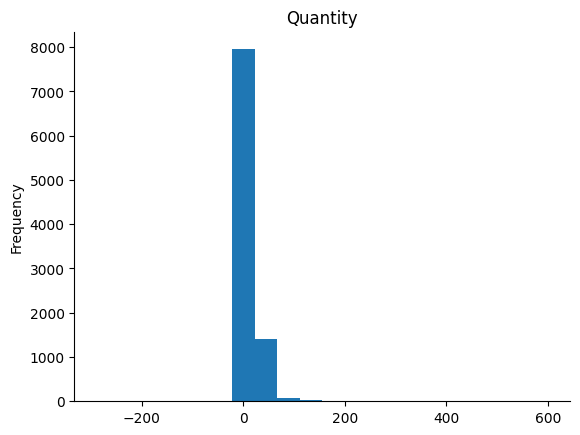

In [72]:
# @title Quantity

from matplotlib import pyplot as plt
df['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: InvoiceNo
колонка: StockCode
колонка: Description
колонка: Quantity
колонка: InvoiceDate
колонка: UnitPrice
колонка: CustomerID
колонка: Country


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   object 
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   int64  
 7   Country      9495 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 593.6+ KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [76]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [77]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Quantity'] = np.nan

In [78]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # Появились пропуски в Quantity (((

InvoiceNo      0
StockCode      0
Description    0
Quantity       5
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [79]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [80]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.Quantity = df_median.Quantity.fillna(df_median.Quantity.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [81]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.Quantity = df_mean.Quantity.fillna(df_median.Quantity.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В своем датасете я выбрал целевую переменную is_old_buyer -> которая была преобразована из quality(Количество товаров) (если количество >= 100, тогда я могу сделать вывод что это старый покупатель, т.к. исходя из графика распределения CustomerID и Quntity больше всего товаров покупают клиенты с ID в диапозоне 12500 - 12800 и немного с 13500-13800, что подтверждает мою теорию, что старые клиенты делаю больше покупок чем новые)```

In [82]:
df['is_old_buyer'] = np.where(df['Quantity'] >= 100, 1, 0).astype(int)

In [83]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'is_old_buyer'],
      dtype='object')

In [84]:
Y = df['is_old_buyer'] # выбираем целевую переменную (категориальную)
X = df.drop('is_old_buyer', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Quantity', axis=1)

5. **Графический анализ**

In [85]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,UnitPrice,CustomerID
0,2.95,12662
1,2.55,12662
2,0.85,12662
3,1.65,12662
4,1.95,12662
...,...,...
9490,1.25,12713
9491,0.85,12713
9492,0.85,12713
9493,2.08,12713


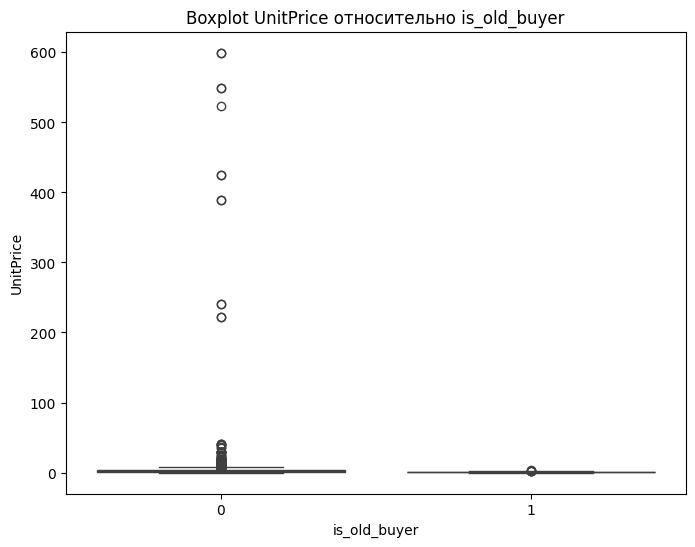

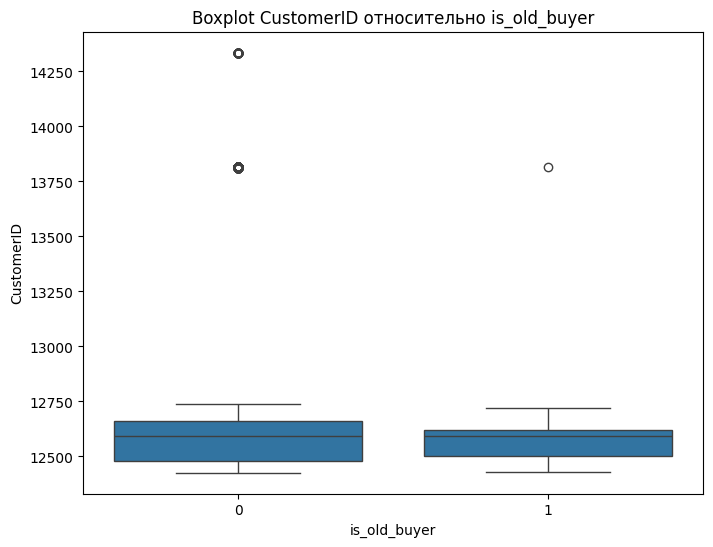

In [91]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_old_buyer', y=col, data=df)
    plt.title(f'Boxplot {col} относительно is_old_buyer')
    plt.show()

# Построил я значит boxplot и меня очень смущает первый график, я бы хотел, чтобы он строился более очетливо.
# В целом я понимаю почему так, у нас есть товары цена за ед. которая достаточно велика... и емае их даже видно на графике
# Но мне бы хотелось отобразить их более четко :/

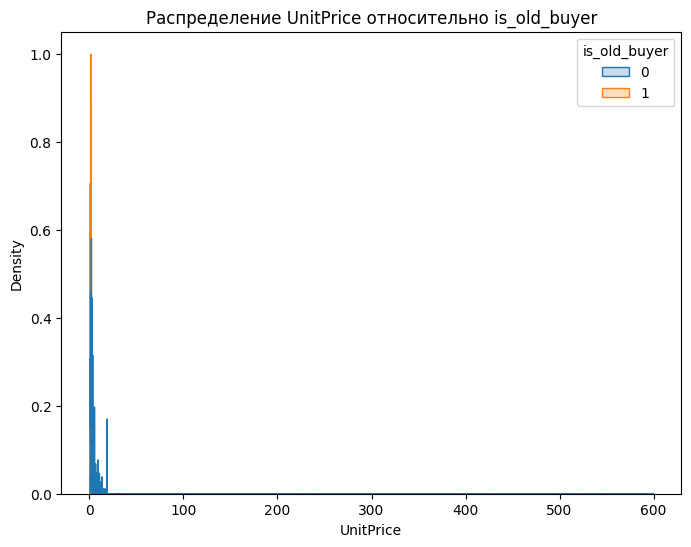

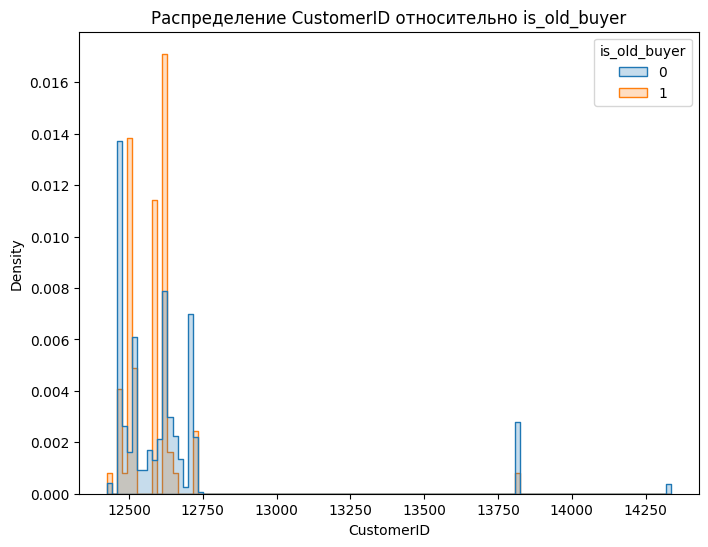

In [92]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='is_old_buyer', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно is_old_buyer')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

In [93]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('is_old_buyer')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('is_old_buyer')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [96]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('is_old_buyer')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для UnitPrice:

               count      mean       std   min   25%   50%   75%     max
is_old_buyer                                                            
0             9423.0  3.990106  16.60989  0.00  1.25  1.95  3.75  599.50
1               72.0  0.933750   0.71043  0.04  0.42  0.72  1.06    3.25


Описательная статистика для CustomerID:

               count          mean         std      min      25%      50%  \
is_old_buyer                                                                
0             9423.0  12646.610952  309.953707  12426.0  12480.0  12592.0   
1               72.0  12584.416667  161.382910  12427.0  12500.0  12590.0   

                  75%      max  
is_old_buyer                    
0             12662.0  14335.0  
1             12619.0  13815.0  




In [95]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


InvoiceNo                     StockCode                     \
                 count unique     top freq     count unique    top freq   
is_old_buyer                                                              
0                 9423    603  540458  149      9423   1666   POST  383   
1                   72     37  552978   13        72     51  16045    7   

             Description                                         InvoiceDate  \
                   count unique                         top freq       count   
is_old_buyer                                                                   
0                   9423   1698                     POSTAGE  383        9423   
1                     72     51  POPART WOODEN PENCILS ASST    7          72   

                                          Country                        
             unique              top freq   count unique      top  freq  
is_old_buyer                                                             
0               598   1/7/2011 12:28  149    9423      1  Germany  9423  
1                37  5/12/2011 14:46   13      72      1  Germany    72

#### 1. ** UnitPrice**:
 - Средняя цена за единицу для новых покупателей (isoldbuyer = 0) составляет 3.99, в то время как для старых покупателей (isoldbuyer = 1) она значительно ниже — 0.93. Можно сказать что у старых покупателей есть некие привелегии по отношению к старым (но это не точно)
 - Стандартное отклонение для новых покупателей высоко (16.61), что указывает на широкий разброс в ценах, включая товары с высокими ценами (максимум 599.50).
 - Для старых покупателей, минимальная цена равна 0.04, а максимальная — 3.25, а разброс цен гораздо меньшею.

#### 2. ** CustomerID:**:
- Средний идентификатор клиента для новых покупателей составляет 12646.61, что немного выше среднего старых покупателей — 12584.42. что говорит о том, что старые покупатели сосредоточены в данном диапозоне, и что именно они являются основной базой покупающей товары.
И еще у меня есть предположение что они зкаказывают одни и те же товары.
- Стандартное отклонение для новых клиентов (309.95) выше, чем у старых (161.38), что может указывать на большую вариативность в идентификаторах новых клиентов.
- Процентныеiles (25%, 50%, 75%) близки для обеих групп, что говорит о некотором схожем распределении клиентов в каждой категории.

И емае не знаю почему так, но мне кажется что данных должно быть гораздо больше. Буду честен, я посмотрел статистику у других студентов и мне кажется, что моих данных ну как-то маловато...





### Вывод:
На осное анализа данных можно сделать вывод, что новые покупатели совершают покупки достаточно дорогих товаров, в то время как старые, сосредоточены в более низком ценовом сегменте. Тем не менее, оба типа покупателей имеют схожие идентификаторы, что может указывать на стабильность клиентской базы.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [97]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Quantity,UnitPrice,CustomerID,is_old_buyer
Quantity,1.000000,-0.087000,-0.025683,0.660988
UnitPrice,-0.087000,1.000000,0.028412,-0.016022
CustomerID,-0.025683,0.028412,1.000000,-0.017454
is_old_buyer,0.660988,-0.016022,-0.017454,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
### Quantity и UnitPrice:
- Коэффициент -0.087 что может свидетельствовать, что при увеличении количества товаров цена на единицу слегка снижается. Как я понимаю, работает по принципу оптовой закупки: Больше товара -> сделаем вам Скидочку меньше -> ну в след. раз бери больше
### Quantity и CustomerID:
- Коэффициент равен -0.025683 ну почти = 0, скажем что отсутсвует зависимость между количеством товара и ID покупателя.
###  Quantity и is_old_buyer:
- Значительно большой Коэф.  0.660988  и можно сказать что старые покупатели являются основной покупающей базой, т.к. покупают больше товара УРааа я был прав 🍾🍾🍾🍾🍾🍾
### UnitPrice и CustomerID:
- Коэффициент 0.028412 указывает на практически нулевую положительную корреляцию, то есть между ценой и идентификатором покупателя нет явной связи.
###  UnitPrice и is_old_buyer:
- Негативный коэффициент -0.016022 говорит о том, что цена на товар не связана со статусом покупателя.
### CustomerID и isoldbuyer:
- Ну впринципе как в 5 и 4 табе Коэффициент -0.017454 указывает на отсутствие значимой корреляции между идентификатором покупателя и его статусом.

Вывод: Основная зависимость наблюдается между количеством товаров и статусом покупателя. Остальные признаки достаточно слабы.

На этом врод как все, можно идти спать...

### Описание корреляций для значимых признаков:



1. **Alcohol и Quality (0.444)**:
   - Есть умеренная положительная корреляция между содержанием алкоголя и качеством вина. Это указывает на то, что вина с более высоким содержанием алкоголя чаще оцениваются выше. Этот признак может быть значимым для прогнозирования качества вина, поскольку он имеет достаточно сильную связь с целевой переменной.

2. **Alcohol и is_best_wine (0.390)**:
   - Похожая корреляция наблюдается между содержанием алкоголя и принадлежностью вина к категории лучших (is_best_wine). Более высокое содержание алкоголя коррелирует с вероятностью, что вино будет оценено как "лучшее".

3. **Quality и is_best_wine (0.759)**:
   - Как и ожидалось, очень высокая корреляция между качеством вина и принадлежностью к категории лучших вин. Это обусловлено тем, что признак `is_best_wine` напрямую основан на значении `quality`.

4. **Total Sulfur Dioxide и Free Sulfur Dioxide (0.720)**:
   - Высокая корреляция между общим и свободным диоксидом серы. Это вполне ожидаемо, так как общий диоксид серы включает в себя свободную и связанную формы. В этом случае один из признаков может быть исключен для предотвращения избыточности информации в модели.

5. **Residual Sugar и Density (0.553)**:
   - Средняя положительная корреляция между остаточным сахаром и плотностью вина. Более высокое содержание остаточного сахара увеличивает плотность вина, что логично, так как сахар увеличивает массу раствора. Этот признак также может вызвать мультиколлинеарность.

6. **Density и Alcohol (-0.687)**:
   - Сильная отрицательная корреляция между плотностью и содержанием алкоголя. Вина с высоким содержанием алкоголя имеют меньшую плотность, что объясняется физическими свойствами спирта. Это важно учитывать при построении моделей, чтобы избежать мультиколлинеарности.

7. **Alcohol и Density (-0.686)**:
   - Как уже упоминалось, это значительная отрицательная корреляция. В этом случае, возможно, стоит исключить один из этих признаков для предотвращения мультиколлинеарности.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country', 'bestPokup']


In [43]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [44]:
X_processed

,UnitPrice,InvoiceNo_536840,InvoiceNo_536861,InvoiceNo_536967,InvoiceNo_536983,InvoiceNo_537197,InvoiceNo_537198,InvoiceNo_537201,InvoiceNo_537212,InvoiceNo_537250,...,CustomerID_13810,CustomerID_13811,CustomerID_13812,CustomerID_13813,CustomerID_13814,CustomerID_13815,CustomerID_13816,CustomerID_13817,CustomerID_14335,bestPokup_1
0,2.95,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.55,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.95,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,1.25,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9491,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9492,0.85,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9493,2.08,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['UnitPrice']


In [46]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [47]:
X_processed

,UnitPrice,InvoiceNo_536840,InvoiceNo_536861,InvoiceNo_536967,InvoiceNo_536983,InvoiceNo_537197,InvoiceNo_537198,InvoiceNo_537201,InvoiceNo_537212,InvoiceNo_537250,...,CustomerID_13810,CustomerID_13811,CustomerID_13812,CustomerID_13813,CustomerID_13814,CustomerID_13815,CustomerID_13816,CustomerID_13817,CustomerID_14335,bestPokup_1
0,0.004921,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.004254,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.002752,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.003253,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,0.002085,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9491,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9492,0.001418,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9493,0.003470,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [48]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [49]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9946
Точность на тестовой выборке: 0.9932

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1885
           1       1.00      0.07      0.13        14

    accuracy                           0.99      1899
   macro avg       1.00      0.54      0.56      1899
weighted avg       0.99      0.99      0.99      1899



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [50]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                                     Feature  Coefficient
4587                        CustomerID_12500     2.508268
623                          StockCode_16045     2.493369
3348  Description_POPART WOODEN PENCILS ASST     2.493369
4666                             bestPokup_1     2.393641
4623                        CustomerID_12619     2.076598
...                                      ...          ...
4487             InvoiceDate_8/23/2011 11:49     0.000000
1331                         StockCode_22533     0.000000
1325                         StockCode_22524     0.000000
2602     Description_CHRISTMAS GINGHAM HEART     0.000000
4322             InvoiceDate_4/19/2011 12:23     0.000000

[4667 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [51]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9924
Отклонение точности: 0.0003


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

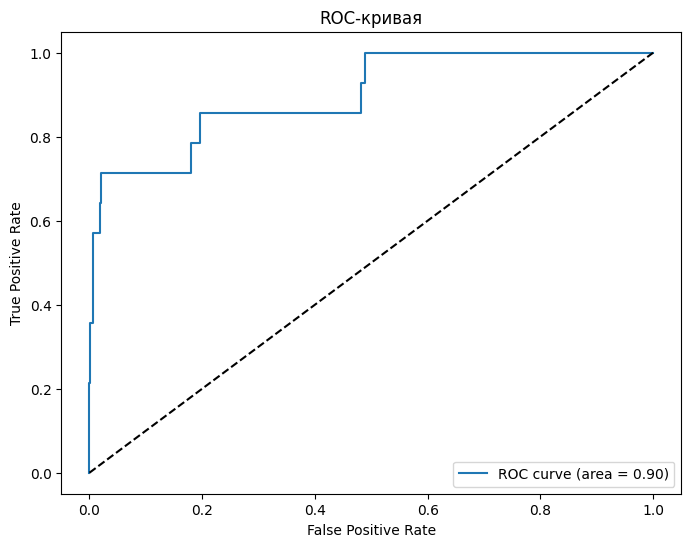

In [53]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---